## Encodings

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = {
    'Temperature' : ['Hot', 'Cold', 'Very Hot', 'Warm', 'Hot', 'Warm', 'Warm', 'Hot', 'Hot', 'Cold'],
    'Color' : ['Red', 'Yellow', 'Blue', 'Blue', 'Red', 'Yellow', 'Red', 'Yellow', 'Yellow', 'Yellow'],
    'Target' : [1,1,1,0,1,0,1,0,1,1]
}
df = pd.DataFrame(data, columns=['Temperature', 'Color', 'Target'])
df.head()

,Temperature,Color,Target
0,Hot,Red,1
1,Cold,Yellow,1
2,Very Hot,Blue,1
3,Warm,Blue,0
4,Hot,Red,1


### 1. One Hot Encoding

we map each category to a vector that contains 1 and 0 denoting the presence or absence of the feature. The number of vectors depends on the number of categories for features. This method produces a lot of columns that slows down the learning significantly if the number of the category is very high for the feature.

In [5]:
print(df.Temperature.nunique())
pd.get_dummies(df, prefix='Temp', columns=['Temperature'])

4


,Color,Target,Temp_Cold,Temp_Hot,Temp_Very Hot,Temp_Warm
0,Red,1,0,1,0,0
1,Yellow,1,1,0,0,0
2,Blue,1,0,0,1,0
3,Blue,0,0,0,0,1
4,Red,1,0,1,0,0
5,Yellow,0,0,0,0,1
6,Red,1,0,0,0,1
7,Yellow,0,0,1,0,0
8,Yellow,1,0,1,0,0
9,Yellow,1,1,0,0,0


Scikit-learn has **OneHotEncoder** for this purpose, but it does not create an additional feature column

In [37]:
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()
ohe = ohc.fit_transform(df.Temperature.values.reshape(-1,1)).toarray()
df_oh = pd.DataFrame(ohe, columns= ['Temp_'+ ohc.categories_[0][i] for i in range(len(ohc.categories_[0]))])
df_oh.head()

,Temp_Cold,Temp_Hot,Temp_Very Hot,Temp_Warm
0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0


In [40]:
dfh = pd.concat([df, df_oh], axis=1)
dfh

,Temperature,Color,Target,Temp_Cold,Temp_Hot,Temp_Very Hot,Temp_Warm
0,Hot,Red,1,0.0,1.0,0.0,0.0
1,Cold,Yellow,1,1.0,0.0,0.0,0.0
2,Very Hot,Blue,1,0.0,0.0,1.0,0.0
3,Warm,Blue,0,0.0,0.0,0.0,1.0
4,Hot,Red,1,0.0,1.0,0.0,0.0
5,Warm,Yellow,0,0.0,0.0,0.0,1.0
6,Warm,Red,1,0.0,0.0,0.0,1.0
7,Hot,Yellow,0,0.0,1.0,0.0,0.0
8,Hot,Yellow,1,0.0,1.0,0.0,0.0
9,Cold,Yellow,1,1.0,0.0,0.0,0.0


One Hot Encoding is very popular. We can represent all categories by N-1 (N= No of Category) as that is sufficient to encode the one that is not included. Usually, for Regression, we use N-1 (drop first or last column of One Hot Coded new feature ), but for classification, the recommendation is to **use all N columns without as most of the tree-based algorithm**builds a tree based on all available


One hot encoding with **N-1 binary variables should be used in linear Regression**, to ensure the **correct number of degrees of freedom (N-1)**. The linear Regression has access to all of the features as it is being trained, and therefore examines the whole set of dummy variables altogether. This means that N-1 binary variables give complete information about (represent completely) the original categorical variable to the linear Regression. This approach can be adopted for any machine learning algorithm that looks at ALL the features at the same time during training. For example, support vector machines and neural networks as well and clustering algorithms.


In tree-based methods, we will never consider that additional label if we dropp. Thus, if we use the categorical variables in a tree-based learning algorithm, it is good practice to encode it into N binary variables and doesn’t drop

**Degree of Freedom** : The number of independent pieces of information that went into calculating the estimate.
Let’s say you were finding the mean weight loss for a low-carb diet. You could use 4 people, giving 3 degrees of freedom (4 – 1 = 3), or you could use one hundred people with df = 99.

In [135]:
import category_encoders as ce
one_enc = ce.OneHotEncoder(cols=['Temperature'])
one_df = one_enc.fit_transform(df.Temperature)
one_df = pd.concat([df, one_df], axis=1)
one_df

,Temperature,Color,Target,Temperature_1,Temperature_2,Temperature_3,Temperature_4
0,Hot,Red,1,1,0,0,0
1,Cold,Yellow,1,0,1,0,0
2,Very Hot,Blue,1,0,0,1,0
3,Warm,Blue,0,0,0,0,1
4,Hot,Red,1,1,0,0,0
5,Warm,Yellow,0,0,0,0,1
6,Warm,Red,1,0,0,0,1
7,Hot,Yellow,0,1,0,0,0
8,Hot,Yellow,1,1,0,0,0
9,Cold,Yellow,1,0,1,0,0


## 2. Label Encoding

each category is assigned a value from 1 through N (here N is the number of categories for the feature. One major issue with this approach is there is no relation or order between these classes, but the algorithm might consider them as some order, or there is some relationship. In below example it may look like (Cold<Hot<Very Hot<Warm….0 < 1 < 2 < 3 ) 

In [43]:
from sklearn.preprocessing import LabelEncoder
le_df = df.copy()
le_df['Temp_LE_Temp'] = LabelEncoder().fit_transform(le_df.Temperature)
le_df.head()

,Temperature,Color,Target,Temp_LE_Temp
0,Hot,Red,1,1
1,Cold,Yellow,1,0
2,Very Hot,Blue,1,2
3,Warm,Blue,0,3
4,Hot,Red,1,1


Pandas **factorize** also perform the same function.

In [54]:
le_df['Temp_factorize'] = pd.factorize(le_df.Temperature)[0].reshape(-1,1)
le_df.head()

,Temperature,Color,Target,Temp_LE_Temp,Temp_factorize
0,Hot,Red,1,1,0
1,Cold,Yellow,1,0,1
2,Very Hot,Blue,1,2,2
3,Warm,Blue,0,3,3
4,Hot,Red,1,1,0


- as per the order of data (Pandas assigned Hot (0), Cold (1), “Very Hot” (2) and Warm (3)) or
- as per alphabetical sorted order (scikit-learn assigned Cold(0), Hot(1), “Very Hot” (2) and Warm (3)).

### 3. Ordinal Encoding

We do Ordinal encoding to ensure the encoding of variables retains the ordinal nature of the variable.

If we consider in the temperature scale as the order, then the ordinal value should from cold to “Very Hot. “ Ordinal encoding will assign values as ( Cold(1) <Warm(2)<Hot(3)<”Very Hot(4)). Usually, we Ordinal Encoding is done starting from 1.

In [56]:
order = {
    'Cold':1,
    'Warm':2,
    'Hot':3,
    'Very Hot':4
}

le_df['Temp_Ordinal'] = le_df.Temperature.map(order) 
le_df.head()

,Temperature,Color,Target,Temp_LE_Temp,Temp_factorize,Temp_Ordinal
0,Hot,Red,1,1,0,3
1,Cold,Yellow,1,0,1,1
2,Very Hot,Blue,1,2,2,4
3,Warm,Blue,0,3,3,2
4,Hot,Red,1,1,0,3


In [134]:
import category_encoders as ce
ord_enc = ce.OrdinalEncoder(cols=['Temperature'])
ord_df = ord_enc.fit_transform(df.Temperature, df.Target)
ord_df = pd.concat([df, ord_df], axis=1)
ord_df

,Temperature,Color,Target,Temperature
0,Hot,Red,1,1
1,Cold,Yellow,1,2
2,Very Hot,Blue,1,3
3,Warm,Blue,0,4
4,Hot,Red,1,1
5,Warm,Yellow,0,4
6,Warm,Red,1,4
7,Hot,Yellow,0,1
8,Hot,Yellow,1,1
9,Cold,Yellow,1,2


### 4. Binary Encoding

Binary encoding converts a category into binary digits. Each binary digit creates one feature column. If there are n unique categories, then binary encoding results in the only **log(base 2)ⁿ features**. In this example, we have four features; thus, the total number of the binary encoded features will be three features. Compared to One Hot Encoding, this will require fewer feature columns __(for 100 categories One Hot Encoding will have 100 features while for Binary encoding, we will need just seven features)__.

For Binary encoding, one has to follow the following steps:
- The categories are first converted to numeric order starting from 1 (order is created as categories appear in a dataset and do not mean any ordinal nature)
- Then those integers are converted into binary code, so for example 3 becomes 011, 4 becomes 100
- Then the digits of the binary number form separate columns.


Refer to the below diagram for better intuition.

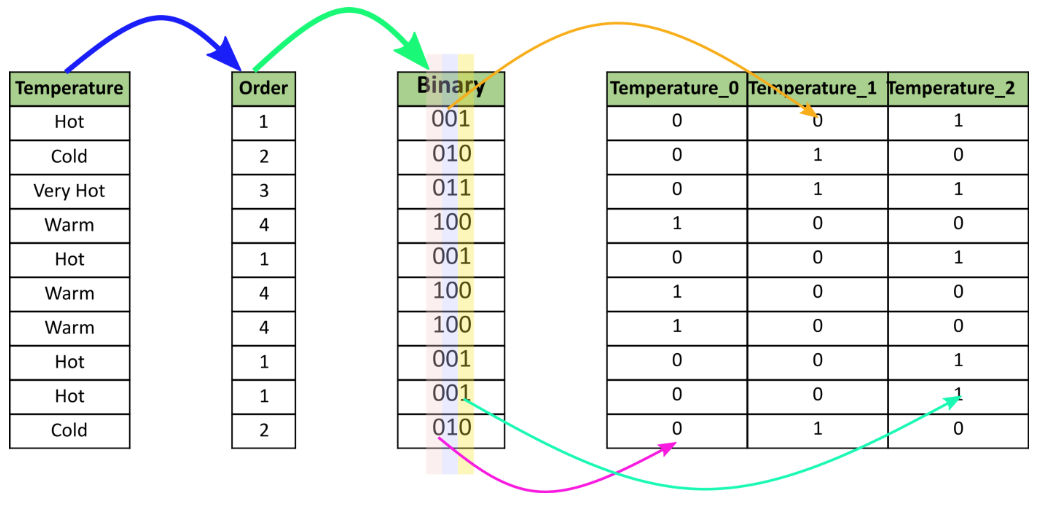

In [57]:
!pip install category_encoders

In [129]:
import category_encoders as ce
bin_enc = ce.BinaryEncoder(cols=['Temperature'])
bin_df = bin_enc.fit_transform(df.Temperature)
bin_df = pd.concat([df, bin_df], axis=1)
bin_df

,Temperature,Color,Target,Temperature_0,Temperature_1,Temperature_2
0,Hot,Red,1,0,0,1
1,Cold,Yellow,1,0,1,0
2,Very Hot,Blue,1,0,1,1
3,Warm,Blue,0,1,0,0
4,Hot,Red,1,0,0,1
5,Warm,Yellow,0,1,0,0
6,Warm,Red,1,1,0,0
7,Hot,Yellow,0,0,0,1
8,Hot,Yellow,1,0,0,1
9,Cold,Yellow,1,0,1,0


### 5. Frequency Encoding
It is a way to utilize the frequency of the categories as labels. In the cases where the frequency is related somewhat with the target variable, it helps the model to understand and assign the weight in direct and inverse proportion, depending on the nature of the data. 

Three-step for this :
- Select a categorical variable you would like to transform
- Group by the categorical variable and obtain counts of each category
- Join it back with the training dataset

In [76]:
df_freq = df.copy()
freq = df.groupby('Temperature').size()/df.shape[0]
df_freq.loc[:, 'Temp_freq'] =  df_freq.Temperature.map(freq)
df_freq

,Temperature,Color,Target,Temp_freq
0,Hot,Red,1,0.4
1,Cold,Yellow,1,0.2
2,Very Hot,Blue,1,0.1
3,Warm,Blue,0,0.3
4,Hot,Red,1,0.4
5,Warm,Yellow,0,0.3
6,Warm,Red,1,0.3
7,Hot,Yellow,0,0.4
8,Hot,Yellow,1,0.4
9,Cold,Yellow,1,0.2


### 6. Mean / Target Encoding
Mean encoding is **similar to label encoding**, except here **labels are correlated directly with the target**. For example, in mean target encoding for each category in the feature label is decided with the mean value of the target variable on a training data. This encoding method brings out the relation between similar categories, but the connections are bounded within the categories and target itself. The advantages of the mean target encoding are that it does not affect the volume of the data and helps in faster learning. Usually, **Mean encoding is notorious for over-fitting; thus, a regularization with cross-validation** or some other approach is a must on most occasions. 

Mean encoding approach is as below:
1. Select a categorical variable you would like to transform
2. Group by the categorical variable and obtain aggregated sum over the “Target” variable. (total number of 1’s for each category in ‘Temperature’)
3. Group by the categorical variable and obtain aggregated count over “Target” variable
4. Divide the step 2 / step 3 results and join it back with the train.
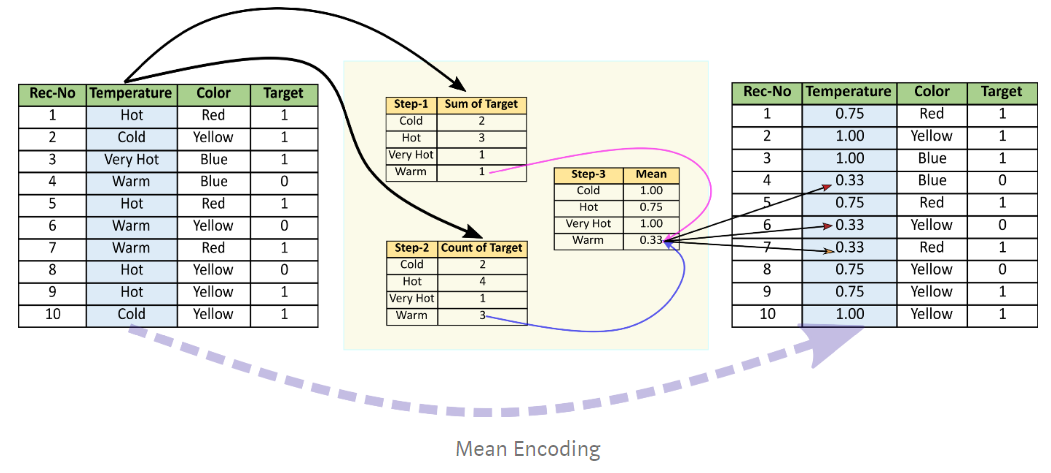

In [99]:
df_target = df.copy()
mean_encode = df_target.groupby('Temperature')['Target'].mean()
print(mean_encode)
df_target.loc[:, 'Temp_targetEnc'] = df_target.Temperature.map(mean_encode)
df_target

Temperature
Cold        1.000000
Hot         0.750000
Very Hot    1.000000
Warm        0.333333
Name: Target, dtype: float64


,Temperature,Color,Target,Temp_targetEnc
0,Hot,Red,1,0.750000
1,Cold,Yellow,1,1.000000
2,Very Hot,Blue,1,1.000000
3,Warm,Blue,0,0.333333
4,Hot,Red,1,0.750000
5,Warm,Yellow,0,0.333333
6,Warm,Red,1,0.333333
7,Hot,Yellow,0,0.750000
8,Hot,Yellow,1,0.750000
9,Cold,Yellow,1,1.000000


Mean encoding can embody the target in the label, whereas label encoding does not correlate with the target. In the case of a large number of features, mean encoding could prove to be a much simpler alternative. Mean encoding tends to group the classes, whereas the grouping is random in case of label encoding.

There are many variations of this target encoding in practice, like smoothing. Smoothing can implement as below:

In [100]:
mean = df_target.Target.mean() # get the global mean
agg = df_target.groupby('Temperature')['Target'].agg(['mean', 'count']) # Get no. of values and mean of each grp
counts = agg['count']
means = agg['mean']
weight = 100

# calculate smoothened mean
smooth = (counts * means + weight * mean) / (counts + weight)
print(smooth)

df_target.loc[:, 'Smooth_targetEnc'] = df_target.Temperature.map(smooth)
df_target


Temperature
Cold        0.705882
Hot         0.701923
Very Hot    0.702970
Warm        0.689320
dtype: float64


,Temperature,Color,Target,Temp_targetEnc,Smooth_targetEnc
0,Hot,Red,1,0.750000,0.701923
1,Cold,Yellow,1,1.000000,0.705882
2,Very Hot,Blue,1,1.000000,0.702970
3,Warm,Blue,0,0.333333,0.689320
4,Hot,Red,1,0.750000,0.701923
5,Warm,Yellow,0,0.333333,0.689320
6,Warm,Red,1,0.333333,0.689320
7,Hot,Yellow,0,0.750000,0.701923
8,Hot,Yellow,1,0.750000,0.701923
9,Cold,Yellow,1,1.000000,0.705882


In [103]:
te = ce.TargetEncoder(cols=['Temperature'])
out = te.fit_transform(df_target, df_target['Target'])
df_target['Temp_TE_encoded'] = out.Temperature
df_target

,Temperature,Color,Target,Temp_targetEnc,Smooth_targetEnc,Temp_TE_encoded
0,0.747629,Red,1,0.750000,0.701923,0.747629
1,0.919318,Yellow,1,1.000000,0.705882,0.919318
2,0.700000,Blue,1,1.000000,0.702970,0.700000
3,0.377041,Blue,0,0.333333,0.689320,0.377041
4,0.747629,Red,1,0.750000,0.701923,0.747629
5,0.377041,Yellow,0,0.333333,0.689320,0.377041
6,0.377041,Red,1,0.333333,0.689320,0.377041
7,0.747629,Yellow,0,0.750000,0.701923,0.747629
8,0.747629,Yellow,1,0.750000,0.701923,0.747629
9,0.919318,Yellow,1,1.000000,0.705882,0.919318


### 7. Weight of Evidence Encoding
Weight of Evidence (WoE) is a measure of the “strength” of a grouping technique to separate good and bad. Weight of evidence (WOE) is a measure of how much the evidence supports or undermines a hypothesis.

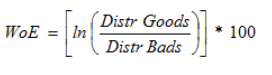

WoE will be 0 if the P(Goods) / P(Bads) = 1. That is if the outcome is random for that group. If P(Bads) > P(Goods) the odds ratio will be < 1 and the WoE will be < 0; if, on the other hand, P(Goods) > P(Bads) in a group, then WoE > 0.

WoE is well suited for Logistic Regression because the Logit transformation is simply the log of the odds, i.e., ln(P(Goods)/P(Bads)). Therefore, by using WoE-coded predictors in Logistic Regression, the predictors are all prepared and coded to the same scale. The parameters in the linear logistic regression equation can be directly compared.

In [118]:
def cal_prob_good_bad(df):
    # Calculate the probability of Target=1, i,e. good = 1 for each category
    df_woe = pd.DataFrame(df.groupby('Temperature')['Target'].mean())

    # Rename the column name as good, to be consistent with the formula
    df_woe.rename(columns={'Target':'good'}, inplace=True)

    # Calculate the probability of bad, i,e. 1 - good
    df_woe['bad'] = 1 - df_woe.good

    # add a very small value to avoid div by 0 error
    df_woe['bad'] = np.where(df_woe['bad']==0, 0.000001, df_woe['bad'])
    
    return df_woe

df_woe = cal_prob_good_bad(df)

# Compute WoE
df_woe['WoE'] = np.log(df_woe.good/df_woe.bad)
print(df_woe)
# map the WoE values back to the df
df_target.loc[:, 'Temp_WoE'] = df.Temperature.map(df_woe['WoE'])
df_target

                 good       bad        WoE
Temperature                               
Cold         1.000000  0.000001  13.815511
Hot          0.750000  0.250000   1.098612
Very Hot     1.000000  0.000001  13.815511
Warm         0.333333  0.666667  -0.693147


,Temperature,Color,Target,Temp_targetEnc,Smooth_targetEnc,Temp_TE_encoded,Temp_WoE
0,0.747629,Red,1,0.750000,0.701923,0.747629,1.098612
1,0.919318,Yellow,1,1.000000,0.705882,0.919318,13.815511
2,0.700000,Blue,1,1.000000,0.702970,0.700000,13.815511
3,0.377041,Blue,0,0.333333,0.689320,0.377041,-0.693147
4,0.747629,Red,1,0.750000,0.701923,0.747629,1.098612
5,0.377041,Yellow,0,0.333333,0.689320,0.377041,-0.693147
6,0.377041,Red,1,0.333333,0.689320,0.377041,-0.693147
7,0.747629,Yellow,0,0.750000,0.701923,0.747629,1.098612
8,0.747629,Yellow,1,0.750000,0.701923,0.747629,1.098612
9,0.919318,Yellow,1,1.000000,0.705882,0.919318,13.815511


In [128]:
import category_encoders as ce
woe_enc = ce.WOEEncoder(cols=['Temperature'])
woe_df = woe_enc.fit_transform(df.Temperature, df.Target)
woe_df = pd.concat([df, woe_df], axis=1)
woe_df

,Temperature,Color,Target,Temperature
0,Hot,Red,1,0.105361
1,Cold,Yellow,1,0.510826
2,Very Hot,Blue,1,0.000000
3,Warm,Blue,0,-0.993252
4,Hot,Red,1,0.105361
5,Warm,Yellow,0,-0.993252
6,Warm,Red,1,-0.993252
7,Hot,Yellow,0,0.105361
8,Hot,Yellow,1,0.105361
9,Cold,Yellow,1,0.510826


### 8. Probability Ratio Encoding 
Probability Ratio Encoding is similar to Weight Of Evidence(WoE), with the only difference is the only ratio of good and bad probability is used. For each label, we calculate the mean of target=1, that is the probability of being 1 ( P(1) ), and also the probability of the target=0 ( P(0) ). And then, we calculate the ratio P(1)/P(0) and replace the labels by that ratio.

In [121]:
df_prob = cal_prob_good_bad(df)

# Calculate the probability ration
df_prob['pr'] = df_prob.good/df_prob.bad

print(df_prob)

# map the prob ratio values back to the df
df_target.loc[:, 'Temp_PrRatio'] = df.Temperature.map(df_prob['pr'])
df_target

                 good       bad         pr
Temperature                               
Cold         1.000000  0.000001  1000000.0
Hot          0.750000  0.250000        3.0
Very Hot     1.000000  0.000001  1000000.0
Warm         0.333333  0.666667        0.5


,Temperature,Color,Target,Temp_targetEnc,Smooth_targetEnc,Temp_TE_encoded,Temp_WoE,Temp_PrRatio
0,0.747629,Red,1,0.750000,0.701923,0.747629,1.098612,3.0
1,0.919318,Yellow,1,1.000000,0.705882,0.919318,13.815511,1000000.0
2,0.700000,Blue,1,1.000000,0.702970,0.700000,13.815511,1000000.0
3,0.377041,Blue,0,0.333333,0.689320,0.377041,-0.693147,0.5
4,0.747629,Red,1,0.750000,0.701923,0.747629,1.098612,3.0
5,0.377041,Yellow,0,0.333333,0.689320,0.377041,-0.693147,0.5
6,0.377041,Red,1,0.333333,0.689320,0.377041,-0.693147,0.5
7,0.747629,Yellow,0,0.750000,0.701923,0.747629,1.098612,3.0
8,0.747629,Yellow,1,0.750000,0.701923,0.747629,1.098612,3.0
9,0.919318,Yellow,1,1.000000,0.705882,0.919318,13.815511,1000000.0


## Cheat Sheet

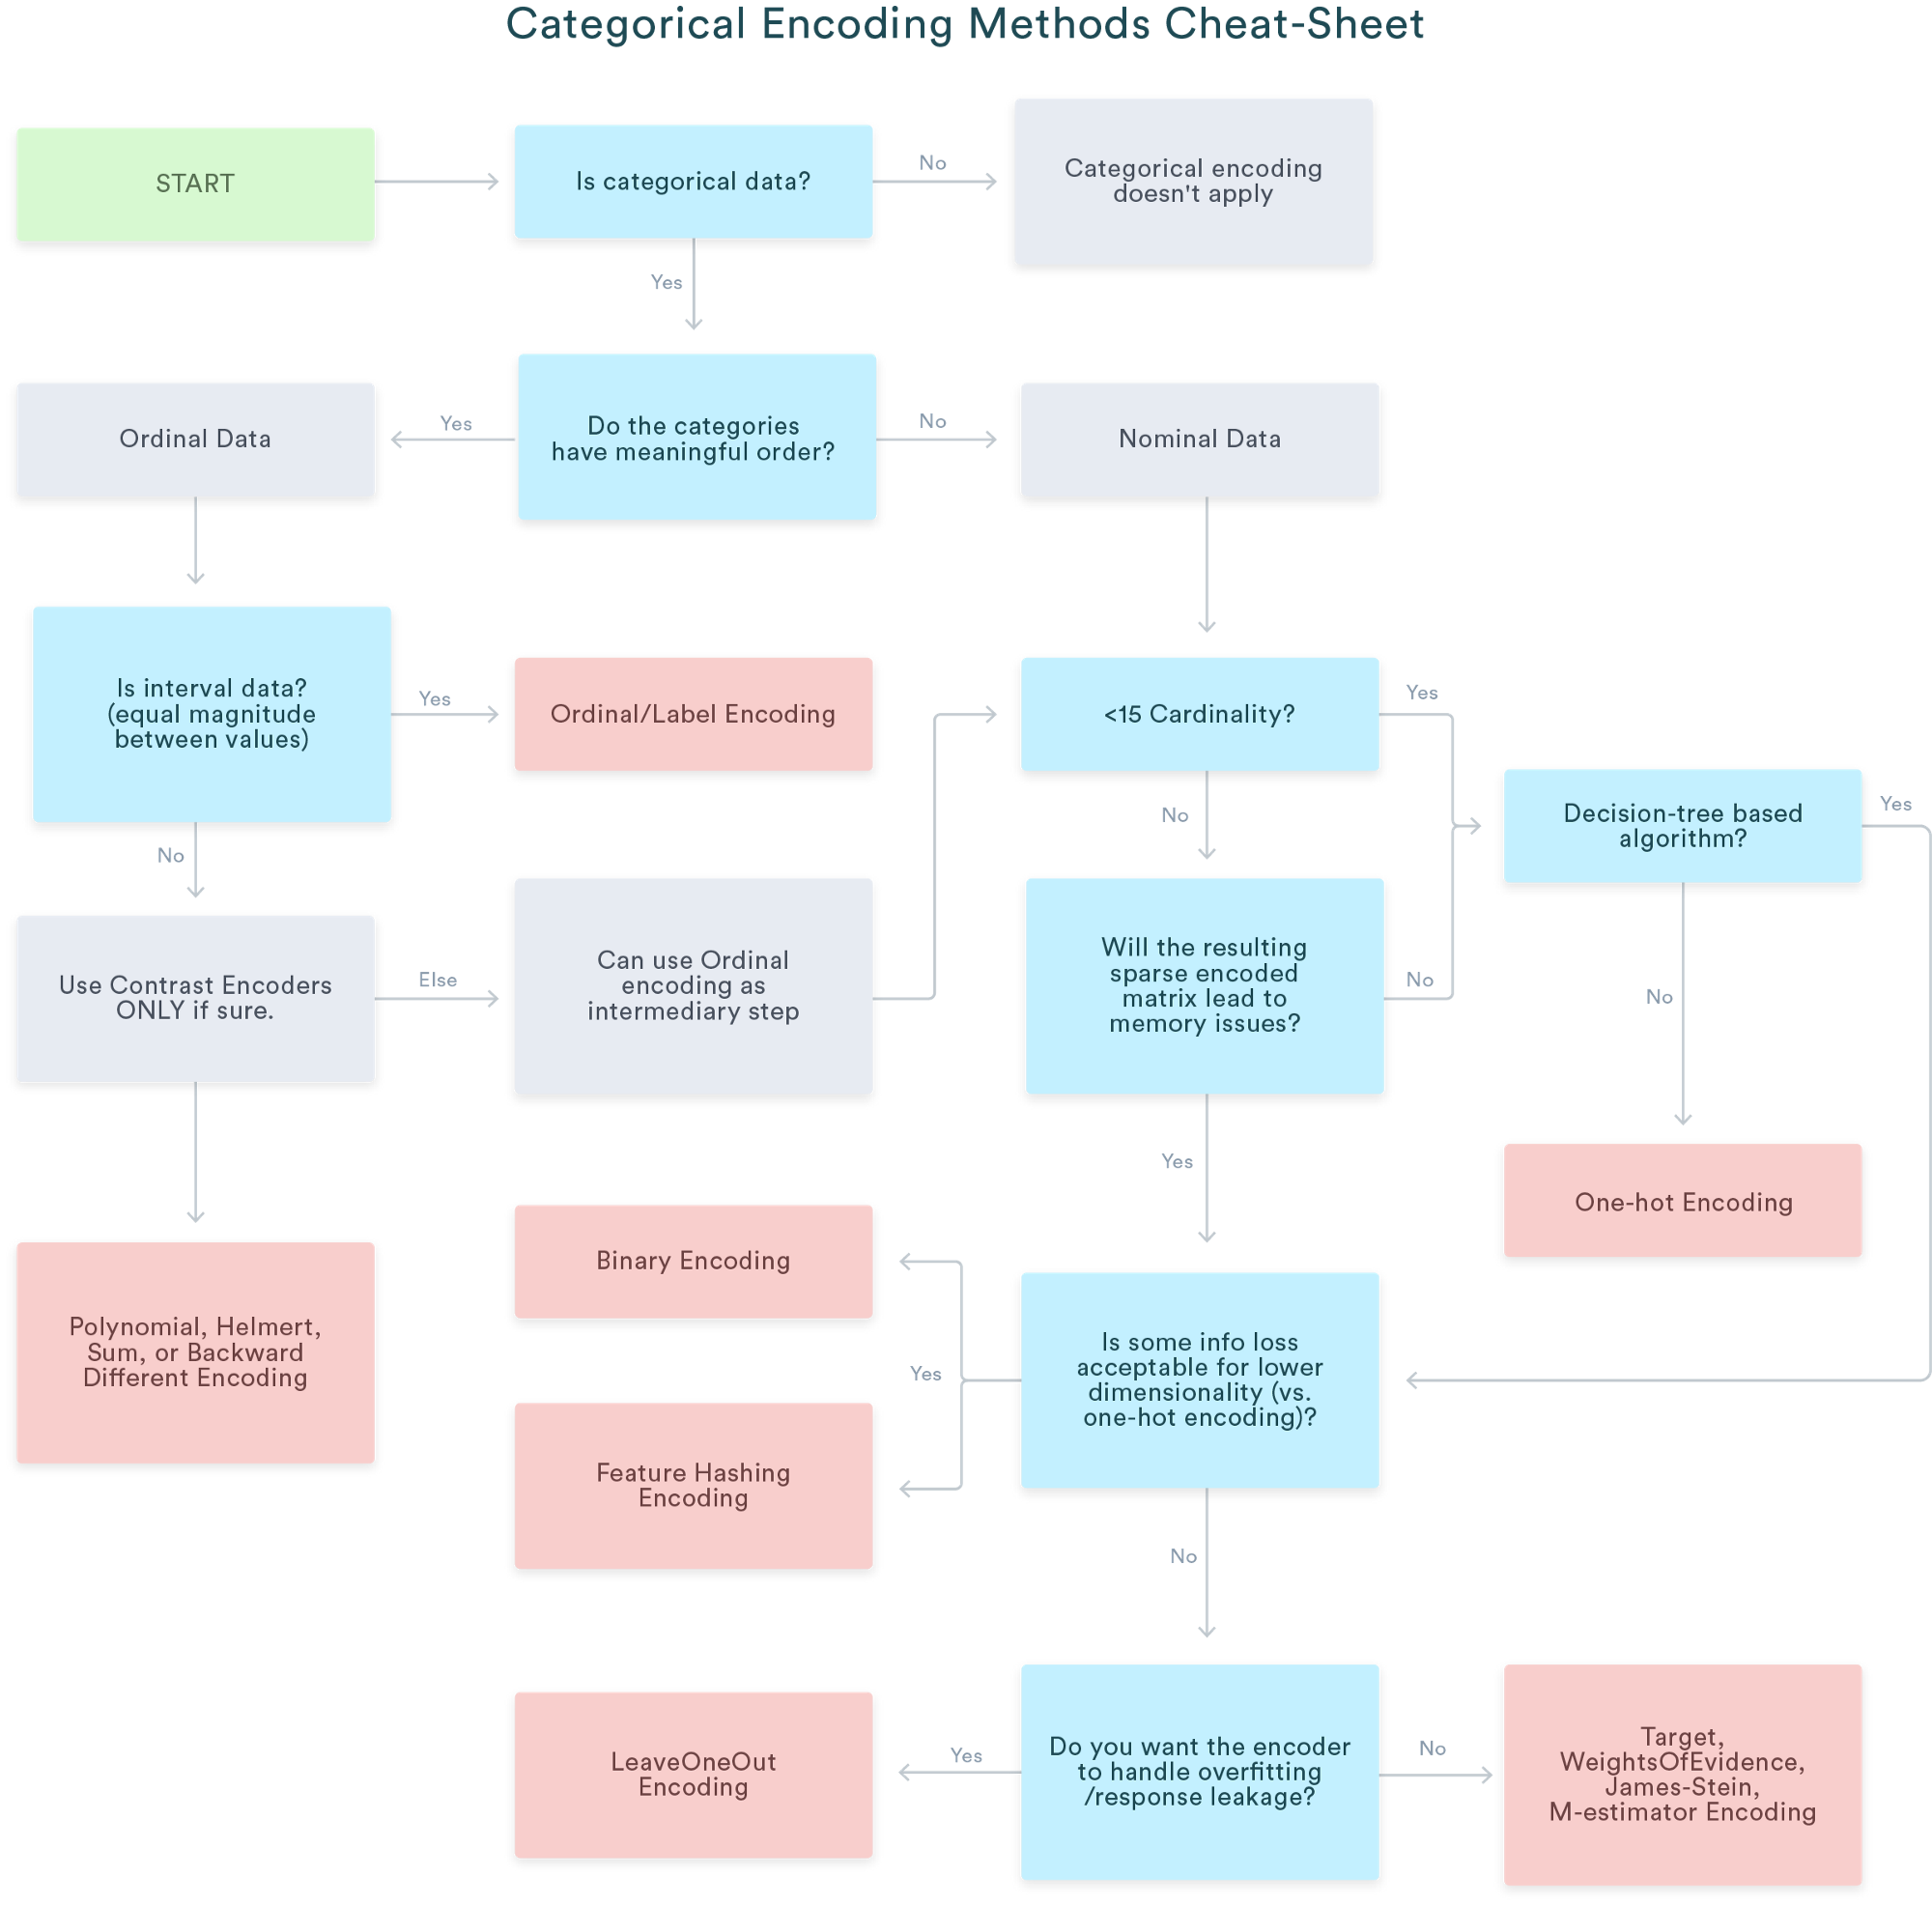